## Exploratory data analysis of NFL player data.
data source: http://nflsavant.com/about.php

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [3]:
players = pd.read_csv("players_2013-12-12.csv")

In [4]:
players.head(10)

,name,first_name,last_name,birth_city,birth_state,birth_country,birth_date,college,draft_team,draft_round,...,draft_year,position,height,weight,death_date,death_city,death_state,death_country,year_start,year_end
0,Isaako Aaitui,Isaako,Aaitui,NaN,NaN,NaN,1/25/1987,NaN,NaN,NaN,...,NaN,NT,4-Jun,315.0,NaN,NaN,NaN,NaN,2013,2013
1,Faye Abbott,Faye,Abbott,Clearport,OH,USA,1895-08-16,Syracuse,NaN,NaN,...,NaN,BB-FB-TB-QB-WB-,8-May,182.0,1/22/1965,Dayton,OH,NaN,1921,1929
2,Vince Abbott,Vince,Abbott,London,NaN,England,5/31/1958,Washington,NaN,NaN,...,NaN,K,11-May,207.0,NaN,NaN,NaN,NaN,1921,1929
3,Duke Abbruzzi,Duke,Abbruzzi,Warren,RI,USA,8/3/1917,Rhode Island,NaN,NaN,...,NaN,HB-DB,10-May,175.0,12/6/1982,Newport,RI,NaN,1921,1929
4,Karim Abdul-Jabbar,Karim,Abdul-Jabbar,Los Angeles,CA,USA,6/28/1974,UCLA,Miami Dolphins,3rd,...,1996.0,RB,10-May,194.0,NaN,NaN,NaN,NaN,1996,2000
5,Isa Abdul-Quddus,Isa,Abdul-Quddus,NaN,NaN,NaN,8/3/1989,Fordham,NaN,NaN,...,NaN,S,1-Jun,220.0,NaN,NaN,NaN,NaN,1996,2000
6,Hamza Abdullah,Hamza,Abdullah,Los Angeles,CA,USA,8/20/1983,Washington St.,Tampa Bay Buccaneers,7th,...,2005.0,DB,2-Jun,213.0,NaN,NaN,NaN,NaN,1996,2000
7,Husain Abdullah,Husain,Abdullah,Los Angeles,CA,USA,7/27/1985,Washington St.,NaN,NaN,...,NaN,DB,Jun-00,204.0,NaN,NaN,NaN,NaN,1996,2000
8,Khalid Abdullah,Khalid,Abdullah,Jacksonville,FL,USA,3/6/1979,Mars Hill,Cincinnati Bengals,5th,...,2003.0,LB,2-Jun,227.0,NaN,NaN,NaN,NaN,1996,2000
9,Rabih Abdullah,Rabih,Abdullah,Martinsville,VA,USA,4/27/1975,Lehigh,NaN,NaN,...,NaN,RB,Jun-00,220.0,NaN,NaN,NaN,NaN,1996,2000


In [23]:
players.shape #

(23733, 21)

## Some questions I'll use to start exploring the data:
+ Where do NFL players come from? (states and schools)
+ What are the pound-for-pound best schools for getting into the NFL?
+ What is the average career length of an NFL player?
+ Has the career length increased/decreased over time?
+ How does position affect career length?
+ Does draft pick have any affect on this?


Where do players come from:

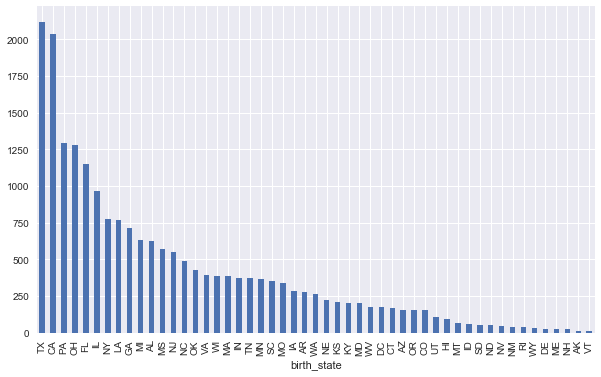

In [5]:
players_by_state = players.groupby(players.birth_state).size() 
players_by_state.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

Add a new column for career length:

In [9]:
players['career_length'] = players.year_end - players.year_start 
players.career_length.head()

0    0
1    8
2    8
3    8
4    4
Name: career_length, dtype: int64

What's the mean career length for an NFL player?

In [10]:
players.career_length.mean()

3.1836683099481733

Let's look at a few visuals to get a better idea of what's happenning. 

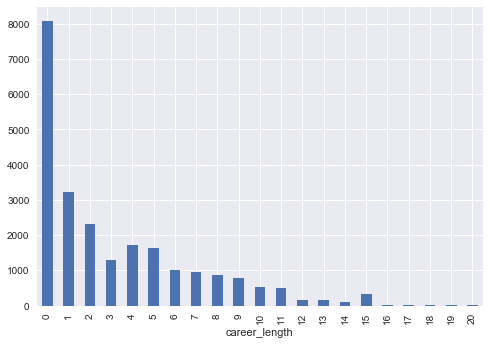

In [9]:
career_length = players.groupby('career_length').size().plot(kind='bar')

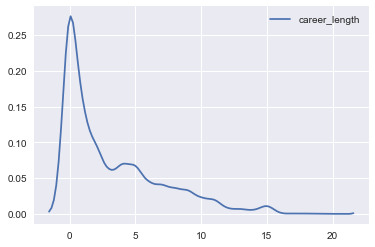

In [12]:
sns.kdeplot(players.career_length)

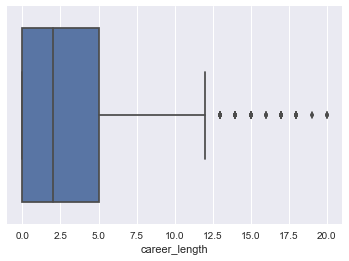

In [13]:
sns.boxplot(players.career_length)

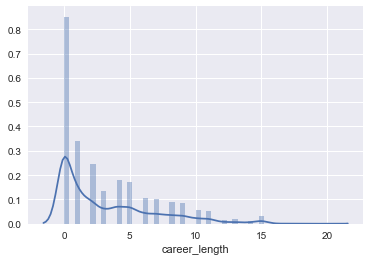

In [51]:
sns.distplot(players.career_length)

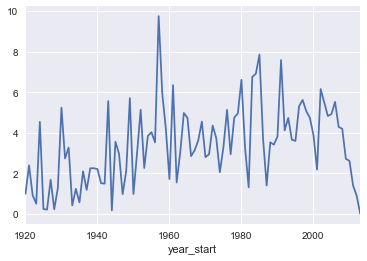

In [54]:
career_by_year = players.groupby('year_start')['career_length'].mean()
career_by_year.plot()

Does this work? Should it be a mean value, or does the trend line still accurately represent things?

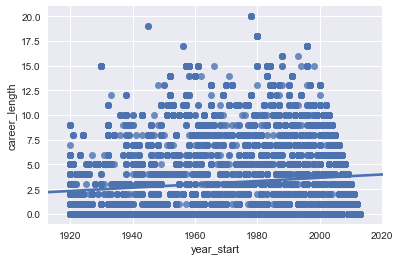

In [55]:
sns.regplot(x="year_start", y="career_length", data=players)

From these two basic plots we can see slight trend to longer careers. However, I think we should consider the NFL really starting with the first Super Bowl.

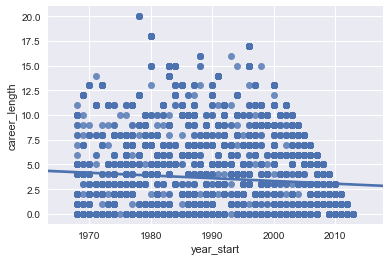

In [57]:
sns.regplot(x="year_start", y="career_length", data=players[players.year_start > 1967]) # first super bowl

A couple interesting observations so far:
+ We see the majority of the players are in the NFL for less than a year. (likely cut, briefly free agents, injured, don't make the team). It would be interesting to gain more insight here.
+ There are some outliers with almost 7 times the mean! Probably big line men and quarter backs. A positional break down with attention to the outliers will be very interesting.
+ There's a little bump at 15 years. Seems... Odd? 
+ Career length from the 1920s until now seemed to be increasing. However, when looking from the first Super Bowl onwards (1967-2013), career length seems to be on the decline. 


TODO:
+ players by state normalized by state population (state pop csv?
+ career length by position
+ careeer length by draft position.


How to deal with position when given de-be-etc
detecting outliers with box plot?
get_dummies(): 0 or 1 for 
hot 1 encoding of dummy variables. melt data